# Tempo Tip5p simulation with ddCosmo
load libraries

In [1]:
import mdtraj as md
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn

from math import exp, sqrt
from sklearn.decomposition import PCA

%matplotlib inline
%load_ext autoreload

In [2]:
sys.path.append("/home/gmancini/Dropbox/appunti/Clustering/src")
sys.path.append("/home/gmancini/Dropbox/appunti/NPBCpy")
import grasp, scores, npbc_io, npbc_cy, npbc_analysis
%autoreload 2

In [3]:
#Do mpl ssettings
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['axes.labelweight']='bold'
plt.rcParams['figure.max_open_warning'] = 100
plt.rcParams['axes.labelpad']=2
plt.rcParams['axes.formatter.useoffset']=False
plt.rcParams['font.weight']='bold'
plt.rcParams['xtick.major.pad']=1
plt.rcParams['ytick.major.pad']=1
plt.rcParams['xtick.labelsize']=8
plt.rcParams['ytick.labelsize']=8
plt.rcParams['lines.markersize']=8
plt.rcParams['axes.titlepad']=1
# dark gray, dim gray ,  dark cyan  ; cyan
gr='#a9a9a9' ; Gr='#696969' ; dc='#008b8b' ;  cy ='#00ffff' ; gn="#00ff00"
Ex='#3232cd' ; In='red'     ; Ad='#ff00ff'

#DO seaborn settings
mysets = {'lines.linewidth': 0.6, 'lines.markersize': 10}                  
sb.set_context("paper", rc = mysets)  
plt.style.use('classic')

plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

## Load trajectory

In [4]:
os.chdir("/home/gmancini/data/devel/gaussian/Tempo/Tip5p")

In [6]:
traj = md.load("q2_tempo_tip5p_ddc.xtc", top="frame0.pdb")
traj

<mdtraj.Trajectory with 2110 frames, 5551 atoms, 1 residues, without unitcells at 0x7f60511b5cd0>

In [7]:
top = traj.topology
top

<mdtraj.Topology with 1 chains, 1 residues, 5551 atoms, 0 bonds at 0x7f6050bd7a60>

In [8]:
index_file = "index.ndx"

## Calculate properties

### radial distribution functions

Calculate RDF for

1. $N-H_{Tip3pFB}$
2. $N-O_{Tip3pFB}$
3. $O-H_{Tip3pFB}$
4. $O-O_{Tip3pFB}$

In [9]:
shift = np.zeros(3)
nbins = 200
calc_cn = True
smooth = False
norm = True
shift = shift/10

In [10]:
rmax = np.asarray((0., 10.))
dmax = 10.
radius = 20.
radius = radius/10.
dmax = dmax/10
rmax = rmax/10

In [11]:
!cat list.txt

  0 System              :  5551 atoms
  1 tempo               :    31 atoms
  2 water               :  5520 atoms
  3 OW                  :  1104 atoms
  4 HW                  :  2208 atoms
  5 tempo_&_O           :     1 atoms
  6 tempo_&_N           :     1 atoms


**$N-H_{H_2O}$**

In [12]:
select = (6,4)
group_A, group_B = npbc_io.parse_index(index_file, select)

--- Parsing index file
--- Found 7 atom groups
--- Selected groups 6:tempo_&_N
--- Selected groups 4:HW


In [13]:
xbins, rdf, cn = npbc_analysis.calc_rdf(501, traj.n_frames, nbins, calc_cn, smooth, norm, radius, \
                                  rmax, dmax, shift, traj, group_A, group_B)
rdf_nh = np.vstack((xbins, rdf, cn)).T

--- Number density in system is  65.89014644004467
--- Read  1610  frames
--- Average number of reference molecules  0.9993788819875776
--- Average number density in dmax  64.77670438941382


In [14]:
np.savetxt("rdf_N_HW.dat", rdf_nh)

**$N-O_{H_2O}$**

In [15]:
select = (6,3)
group_A, group_B = npbc_io.parse_index(index_file, select)

--- Parsing index file
--- Found 7 atom groups
--- Selected groups 6:tempo_&_N
--- Selected groups 3:OW


In [16]:
xbins, rdf, cn = npbc_analysis.calc_rdf(501, traj.n_frames, nbins, calc_cn, smooth, norm, radius, \
                                  rmax, dmax, shift, traj, group_A, group_B)
rdf_no = np.vstack((xbins, rdf, cn)).T

--- Number density in system is  32.94507322002234
--- Read  1610  frames
--- Average number of reference molecules  0.9993788819875776
--- Average number density in dmax  32.35402514254032


In [17]:
np.savetxt("rdf_N_OW.dat", rdf_no)

**$O-H_{H_2O}$**

In [18]:
select = (5,4)
group_A, group_B = npbc_io.parse_index(index_file, select)

--- Parsing index file
--- Found 7 atom groups
--- Selected groups 5:tempo_&_O
--- Selected groups 4:HW


In [19]:
xbins, rdf, cn = npbc_analysis.calc_rdf(501, traj.n_frames, nbins, calc_cn, smooth, norm, radius, \
                                  rmax, dmax, shift, traj, group_A, group_B)
rdf_oh = np.vstack((xbins, rdf, cn)).T

--- Number density in system is  65.89014644004467
--- Read  1610  frames
--- Average number of reference molecules  0.9993788819875776
--- Average number density in dmax  64.5725214484473


In [20]:
np.savetxt("rdf_O_HW.dat", rdf_oh)

**$O-O_{H_2O}$**

In [21]:
select = (5,3)
group_A, group_B = npbc_io.parse_index(index_file, select)

--- Parsing index file
--- Found 7 atom groups
--- Selected groups 5:tempo_&_O
--- Selected groups 3:OW


In [22]:
xbins, rdf, cn = npbc_analysis.calc_rdf(501, traj.n_frames, nbins, calc_cn, smooth, norm, radius, \
                                  rmax, dmax, shift, traj, group_A, group_B)
rdf_oo = np.vstack((xbins, rdf, cn)).T

--- Number density in system is  32.94507322002234
--- Read  1610  frames
--- Average number of reference molecules  0.9993788819875776
--- Average number density in dmax  32.26446341680033


In [23]:
np.savetxt("rdf_O_HW.dat", rdf_oo)

In [24]:
xrdf = np.convolve(rdf_nh[:,0], np.ones(5)/5, mode='valid')
rdf0 = np.convolve(rdf_nh[:,1], np.ones(5)/5, mode='valid')
rdf1 = np.convolve(rdf_no[:,1], np.ones(5)/5, mode='valid')
rdf2 = np.convolve(rdf_oh[:,1], np.ones(5)/5, mode='valid')
rdf3 = np.convolve(rdf_oo[:,1], np.ones(5)/5, mode='valid')

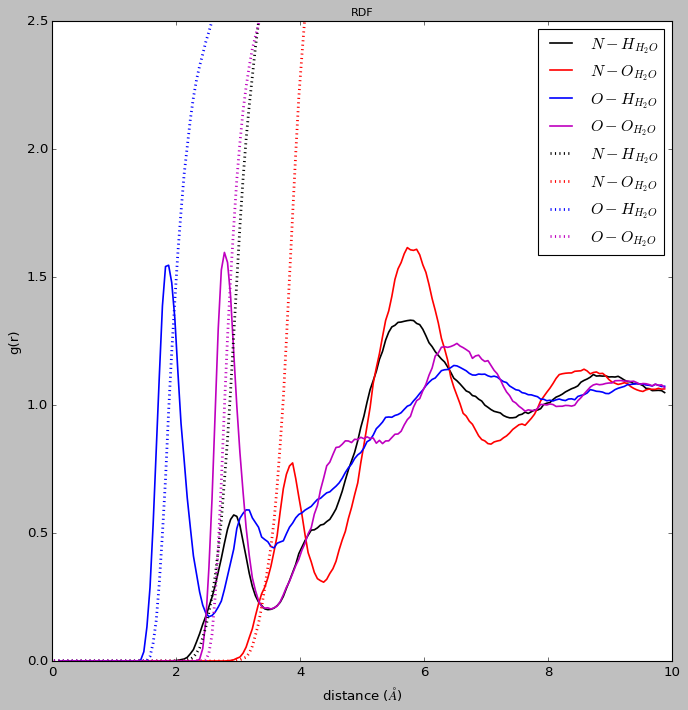

In [25]:
plt.figure(figsize=(10,10))
plt.title('RDF',fontsize=10)
plt.xlim(0., 10.)
plt.ylim(0., 2.5)
plt.plot(xrdf, rdf0, c='k',linestyle='solid', label="$N-H_{H_2O}$", linewidth=1.5)
plt.plot(xrdf, rdf1, c='r',linestyle='solid', label="$N-O_{H_2O}$", linewidth=1.5)
plt.plot(xrdf, rdf2, c='b',linestyle='solid', label="$O-H_{H_2O}$", linewidth=1.5)
plt.plot(xrdf, rdf3, c='m',linestyle='solid', label="$O-O_{H_2O}$", linewidth=1.5)
plt.plot(xbins, rdf_nh[:,2], c='k',linestyle='dotted', label="$N-H_{H_2O}$", linewidth=2.5)
plt.plot(xbins, rdf_no[:,2], c='r',linestyle='dotted', label="$N-O_{H_2O}$", linewidth=2.5)
plt.plot(xbins, rdf_oh[:,2], c='b',linestyle='dotted', label="$O-H_{H_2O}$", linewidth=2.5)
plt.plot(xbins, rdf_oo[:,2], c='m',linestyle='dotted', label="$O-O_{H_2O}$", linewidth=2.5)
plt.xlabel("distance ($\AA$)")
plt.ylabel("g(r)")
plt.legend()

### hydrogen bond

In [26]:
rdf = np.array((1.8, 0.15))/10
adf = np.array((14., 10))
bmax = np.array((0., 1.2))/10
hmax = np.array((0., 3.5))/10
dmax = np.array((0., 4.5))/10
norm = True

In [27]:
select = (4,3,5)
group_A, group_B, group_C = npbc_io.parse_index(index_file, select)

--- Parsing index file
--- Found 7 atom groups
--- Selected groups 4:HW
--- Selected groups 3:OW
--- Selected groups 5:tempo_&_O


In [28]:
frame, histH, timeF = \
    npbc_analysis.calc_hbonds(501, traj.n_frames, shift, traj, rdf, adf, bmax, hmax, dmax, \
        nbins, norm, group_A, group_B, group_C)

--- Read  1609  frames


[Text(0.5, 1.0, '$F_{HB}$ histogram')]

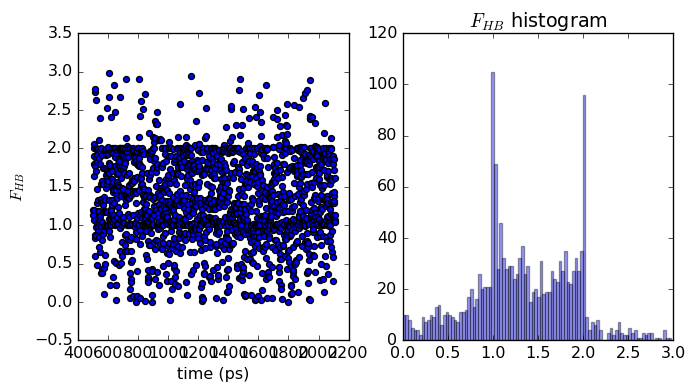

In [29]:
fig=plt.figure(figsize=(8,4), dpi= 96, facecolor='w', edgecolor='k')

plt.subplot(121)
plt.scatter(np.linspace(501, frame+501, frame), timeF)
plt.xlabel("time (ps)")
plt.ylabel("$F_{HB}$")

plt.subplot(122)
bins = np.histogram_bin_edges(timeF, bins=100)
sb.distplot(timeF, bins=bins, kde=False, color='b').set(title='$F_{HB}$ histogram')

In [30]:
fhb = np.vstack((np.linspace(501, frame+501, frame), timeF)).transpose()
np.savetxt("O_HW_fhb.dat", fhb)

**Average number of H bonds**

In [31]:
np.mean(timeF), np.std(timeF)

(1.3223808514614734, 0.5634871989748473)

### distance vs time, 1st neighbour

In [32]:
metric = "euclidean"

In [33]:
nneigh = 1

**$N-H_{H_2O}$**

In [34]:
select = (6,4)
group_A, group_B = npbc_io.parse_index(index_file, select)

--- Parsing index file
--- Found 7 atom groups
--- Selected groups 6:tempo_&_N
--- Selected groups 4:HW


In [35]:
frame, timeD = npbc_analysis.calc_nearest_dist(501, traj.n_frames, shift, traj, nneigh, metric, group_A, group_B)

--- Read  1609  frames


In [36]:
distNH_1 = np.vstack((np.linspace(501, frame+501, frame), timeD)).transpose()
np.savetxt("distNH_1.dat", distNH_1, fmt="%9.6f")

**$N-O_{H_2O}$**

In [37]:
select = (6,3)
group_A, group_B = npbc_io.parse_index(index_file, select)

--- Parsing index file
--- Found 7 atom groups
--- Selected groups 6:tempo_&_N
--- Selected groups 3:OW


In [38]:
frame, timeD = npbc_analysis.calc_nearest_dist(501, traj.n_frames, shift, traj, nneigh, metric, group_A, group_B)

--- Read  1609  frames


In [39]:
distNO_1 = np.vstack((np.linspace(501, frame+501, frame), timeD)).transpose()
np.savetxt("distNO_1.dat", distNO_1, fmt="%9.6f")

**$O-H_{H_2O}$**

In [40]:
select = (5,4)
group_A, group_B = npbc_io.parse_index(index_file, select)

--- Parsing index file
--- Found 7 atom groups
--- Selected groups 5:tempo_&_O
--- Selected groups 4:HW


In [41]:
frame, timeD = npbc_analysis.calc_nearest_dist(501, traj.n_frames, shift, traj, nneigh, metric, group_A, group_B)

--- Read  1609  frames


In [42]:
distOH_1 = np.vstack((np.linspace(501, frame+501, frame), timeD)).transpose()
np.savetxt("distOH_1.dat", distOH_1, fmt="%9.6f")

**$O-O_{H_2O}$**

In [43]:
select = (5,3)
group_A, group_B = npbc_io.parse_index(index_file, select)

--- Parsing index file
--- Found 7 atom groups
--- Selected groups 5:tempo_&_O
--- Selected groups 3:OW


In [44]:
frame, timeD = npbc_analysis.calc_nearest_dist(501, traj.n_frames, shift, traj, nneigh, metric, group_A, group_B)

--- Read  1609  frames


In [45]:
distOO_1 = np.vstack((np.linspace(501, frame+501, frame), timeD)).transpose()
np.savetxt("distOO_1.dat", distOO_1, fmt="%9.6f")

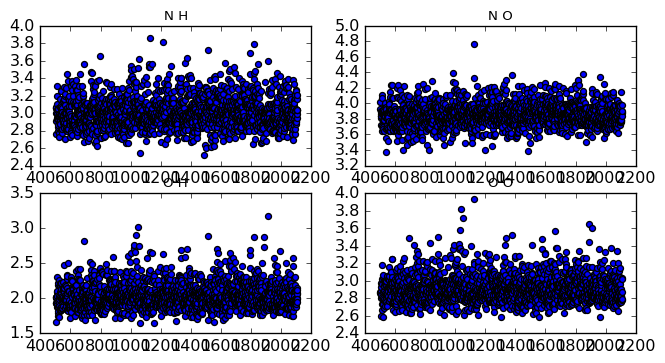

In [46]:
fig=plt.figure(figsize=(8,4), dpi= 96, facecolor='w', edgecolor='k')

plt.subplot(221)
plt.title('N H',fontsize=10)
plt.scatter(distNH_1[:,0],distNH_1[:,1])

plt.subplot(222)
plt.title('N O',fontsize=10)
plt.scatter(distNO_1[:,0],distNO_1[:,1])

plt.subplot(223)
plt.title('O H',fontsize=10)
plt.scatter(distOH_1[:,0],distOH_1[:,1])

plt.subplot(224)
plt.title('O O',fontsize=10)
plt.scatter(distOO_1[:,0],distOO_1[:,1])

### distance vs time, 2nd neighbour

In [47]:
nneigh = 2

**$N-H_{H_2O}$**

In [48]:
select = (6,4)
group_A, group_B = npbc_io.parse_index(index_file, select)

--- Parsing index file
--- Found 7 atom groups
--- Selected groups 6:tempo_&_N
--- Selected groups 4:HW


In [49]:
frame, timeD = npbc_analysis.calc_nearest_dist(501, traj.n_frames, shift, traj, nneigh, metric, group_A, group_B)

--- Read  1609  frames


In [50]:
distNH_2 = np.vstack((np.linspace(501, frame+501, frame), timeD)).transpose()
np.savetxt("distNH_2.dat", distNH_2, fmt="%9.6f")

**$N-O_{H_2O}$**

In [51]:
select = (6,3)
group_A, group_B = npbc_io.parse_index(index_file, select)

--- Parsing index file
--- Found 7 atom groups
--- Selected groups 6:tempo_&_N
--- Selected groups 3:OW


In [52]:
frame, timeD = npbc_analysis.calc_nearest_dist(501, traj.n_frames, shift, traj, nneigh, metric, group_A, group_B)

--- Read  1609  frames


In [53]:
distNO_2 = np.vstack((np.linspace(501, frame+501, frame), timeD)).transpose()
np.savetxt("distNO_2.dat", distNO_2, fmt="%9.6f")

**$O-H_{H_2O}$**

In [54]:
select = (5,4)
group_A, group_B = npbc_io.parse_index(index_file, select)

--- Parsing index file
--- Found 7 atom groups
--- Selected groups 5:tempo_&_O
--- Selected groups 4:HW


In [55]:
frame, timeD = npbc_analysis.calc_nearest_dist(501, traj.n_frames, shift, traj, nneigh, metric, group_A, group_B)

--- Read  1609  frames


In [56]:
distOH_2 = np.vstack((np.linspace(501, frame+501, frame), timeD)).transpose()
np.savetxt("distOH_2.dat", distOH_2, fmt="%9.6f")

**$O-O_{H_2O}$**

In [57]:
select = (5,3)
group_A, group_B = npbc_io.parse_index(index_file, select)

--- Parsing index file
--- Found 7 atom groups
--- Selected groups 5:tempo_&_O
--- Selected groups 3:OW


In [58]:
frame, timeD = npbc_analysis.calc_nearest_dist(501, traj.n_frames, shift, traj, nneigh, metric, group_A, group_B)

--- Read  1609  frames


In [59]:
distOO_2 = np.vstack((np.linspace(501, frame+501, frame), timeD)).transpose()
np.savetxt("distOO_2.dat", distOO_2, fmt="%9.6f")

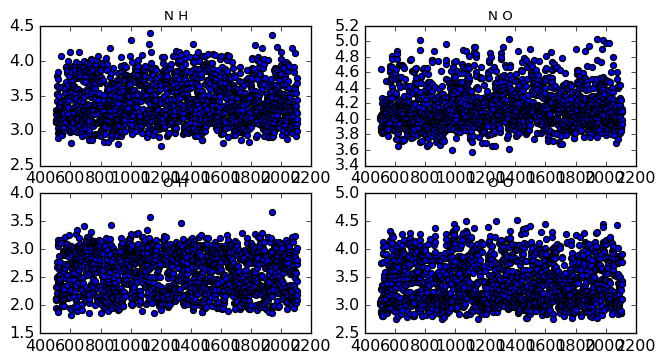

In [60]:
fig=plt.figure(figsize=(8,4), dpi= 96, facecolor='w', edgecolor='k')

plt.subplot(221)
plt.title('N H',fontsize=10)
plt.scatter(distNH_2[:,0],distNH_2[:,1])

plt.subplot(222)
plt.title('N O',fontsize=10)
plt.scatter(distNO_2[:,0],distNO_2[:,1])

plt.subplot(223)
plt.title('O H',fontsize=10)
plt.scatter(distOH_2[:,0],distOH_2[:,1])

plt.subplot(224)
plt.title('O O',fontsize=10)
plt.scatter(distOO_2[:,0],distOO_2[:,1])

### PCA

In [61]:
data = np.vstack((distNH_1[:,1], distNO_1[:,1], distOH_1[:,1], distOO_1[:,1],\
                 distNH_2[:,1], distNO_2[:,1], distOH_2[:,1], distOO_2[:,1])).T
data.shape

(1609, 8)

In [62]:
pca = PCA(n_components=3)
xnew = pca.fit_transform(data)
print(pca.explained_variance_ratio_)

[0.6600448  0.14102692 0.08514954]


### Select frames

Apply GRASP 

In [63]:
distances = scores.frscore(data)

In [64]:
mygrasp = grasp.simpleGRASP(score=distances, do_local=True, n_iter=15, verbose=2, alpha=0.1,N_sel=0.05)
cost, mysol, mycoords =mygrasp.run(data[1:])

-- Starting GRASP with  80  points
building 0 0.1493215573869664
local optimization 0 0.1493215573869664
--- iter, best_score, opt_score, build_score  0 0.1493215573869664 0.1493215573869664 0.1493215573869664
building 1 0.15036293441240725
local optimization 1 0.15034586802667183
building 2 0.15137891124433012
local optimization 2 0.15065472726147952
building 3 0.15042521377187498
local optimization 3 0.15042521377187498
building 4 0.15079546712519903
local optimization 4 0.15079546712519903
building 5 0.14991408200590667
local optimization 5 0.14991408200590667
building 6 0.15043177316820455
local optimization 6 0.15005101079986732
building 7 0.15035780050982356
local optimization 7 0.15035780050982356
building 8 0.14890745895115978
local optimization 8 0.14890745895115978
--- iter, best_score, opt_score, build_score  8 0.14890745895115978 0.14890745895115978 0.14890745895115978
building 9 0.15060583109838938
local optimization 9 0.15060583109838938
building 10 0.15042010808809522
lo

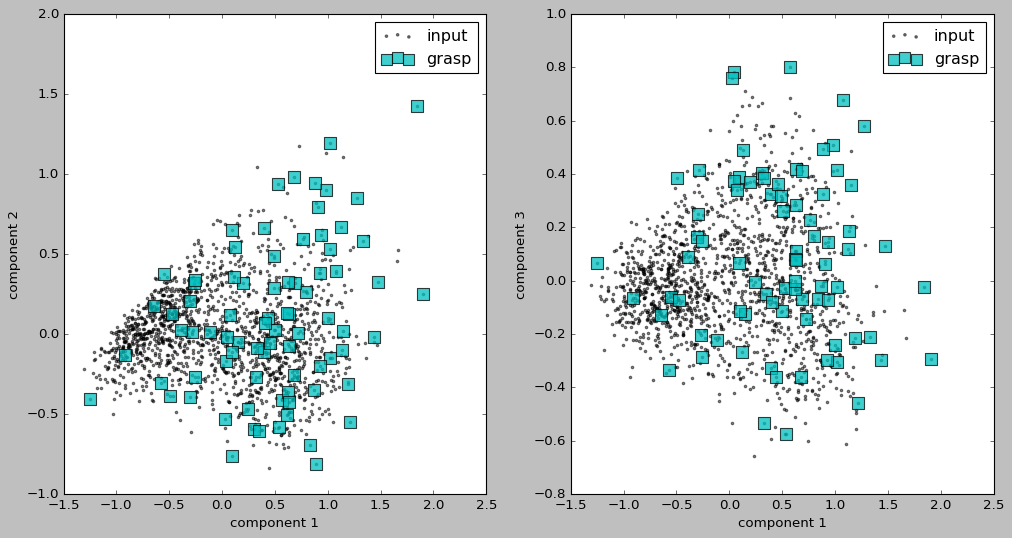

In [65]:
plt.figure(figsize=(15, 7.5))

plt.subplot(121)
x = xnew[:,0]
y = xnew[:,1]
plt.scatter(x, y, marker="o", s=5, c='k', label="input", alpha=0.5)
plt.scatter(x[mysol], y[mysol], label="grasp", marker='s',c='c', s=100,alpha=0.75)
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.legend()

plt.subplot(122)
x = xnew[:,0]
y = xnew[:,2]
plt.scatter(x, y, marker="o", s=5, c='k', label="input", alpha=0.5)
plt.scatter(x[mysol], y[mysol], label="grasp", marker='s',c='c', s=100,alpha=0.75)
plt.xlabel("component 1")
plt.ylabel("component 3")
plt.legend()

### get frames

In [66]:
header = "%nproc=4 \n\
%mem=8GB \n\
%chk=test.chk \n\
#p <placeholder>\n\
<placeholder>\n\
tempo in CH3OH snapshot from MD-ddCosmo\n \
\n\
0 2\n"

In [67]:
frames = traj[mysol]
frames.save_pdb("frames_grasp.pdb")

In [68]:
select = top.select("index < 331")
small_traj = frames[0]
small_traj = small_traj.atom_slice(select)
small_traj.xyz.shape

(1, 331, 3)

In [69]:
nsolute = 31
prefix = "frame_"
nsolvent = 100
nall = 1104
natoms_solvent = 3

In [70]:
for fn, frame in enumerate(mysol):
    fname = prefix + str(fn) + ".gjf"
    f = open(fname, "w")
    text = header
    coords = 10.*npbc_cy.compute_neighbours(nsolute, nsolvent, natoms_solvent, nall, top, frames[fn].xyz[0])
    for na, a in enumerate(top.atoms):
        if na < nsolute:
            if a.element.symbol == 'C':
                line = "C-C--0.0000(fragment=1) {0:f} {1:f} {2:f} H\n".\
                format(coords[na,0], coords[na,1], coords[na,2])
            elif a.element.symbol == 'O':
                line = "O-O--0.0000(fragment=1) {0:f} {1:f} {2:f} H\n".\
                format(coords[na,0], coords[na,1], coords[na,2])
            elif a.element.symbol == 'N':
                line = "N-N--0.0000(fragment=1) {0:f} {1:f} {2:f} H\n".\
                format(coords[na,0], coords[na,1], coords[na,2])
            elif a.element.symbol == 'H':
                line = "H-H--0.0000(fragment=1) {0:f} {1:f} {2:f} H\n".\
                format(coords[na,0], coords[na,1], coords[na,2])
            #else:
            #    raise ValueError("Wrong element in solute")
            text = text + line                
        elif na < natoms_solvent*nsolvent + nsolute:
            res = (na - nsolute)//natoms_solvent+2
            if a.element.symbol == 'O':
                line = "O-OW--0.84844(fragment={0:d}) {1:f} {2:f} {3:f} L\n".\
                format(res, coords[na,0], coords[na,1], coords[na,2])              
            elif a.element.symbol == 'H':
                line = "H-HW-+0.42422(fragment={0:d}) {1:f} {2:f} {3:f} L\n".\
                format(res, coords[na,0], coords[na,1], coords[na,2])              
            else:
                raise ValueError("Wrong element in solute")            
            text = text + line
    text = text + "\n\n"
    f.write(text)
    f.close()

ValueError: Wrong element in solute